# Intro

In [1]:
import numpy as np

inputs = np.array([1, -1, 0, -2, 3])
weights = np.array([1, 2, 1, -1, -3])
bias = -1

output = np.dot(inputs, weights)+bias
print(f"Given\nInput = {input}\nWeights = {weights}\nBias = {bias}\nOutput = {output}")

Given
Input = <bound method Kernel.raw_input of <google.colab._kernel.Kernel object at 0x7b0d20d8b7f0>>
Weights = [ 1  2  1 -1 -3]
Bias = -1
Output = -9


In [3]:
active_output = max(0, output)
print(f"Output after applying ReLU Activation: {active_output}")

Output after applying ReLU Activation: 0


# Multi layered Neural networks

In [10]:
# 4 inputs for the Multi-layered perceptron
inputs = np.random.random(4)
# The weights for 4 inputs for 3 neurons in the layer.
weights = np.random.random((3, 4))
# 3 biases for each neuran in the layer
biases = np.random.random(3)
# output
output = np.dot(inputs, weights.T)+biases
print(f"inputs = {inputs}\nweights = {weights}\nbiases = {biases}\noutput = {output}\nReLU activation output = {[x for x in output]}")


inputs = [0.28833054 0.73203449 0.46820304 0.22803172]
weights = [[0.25303829 0.44443486 0.79903752 0.00419517]
 [0.22260739 0.01562435 0.43225884 0.26347976]
 [0.02120119 0.83541756 0.11666651 0.86941521]]
biases = [0.10744278 0.82558322 0.71036795]
output = [0.88081151 1.16367194 1.58091322]
ReLU activation output = [0.8808115114892827, 1.1636719422541277, 1.5809132196891331]


In [28]:
class Layer:
  def __init__(self, num_neurons, num_inputs, num_batches):
    self.inputs = np.random.random((num_batches, num_inputs))*5-3
    self.weights = np.random.random((num_neurons, num_inputs))*4-2
    self.biases = np.random.random(num_neurons)*2-1



  def forward(self, input):
    self.output = np.dot(input, self.weights.T)+self.biases
    self.activationOutput = [[max(0,a) for a in b] for b in self.output]
    self.activationOutput = np.array(self.activationOutput)

  def print(self):
    print(f"input: {self.inputs}\nweights: {self.weights}\nbiases: {self.biases}\noutput: {self.output}\noutput after ReLU activation: {self.activationOutput}")
layer1 = Layer(4, 5, 10)
layer1.forward(layer1.inputs)
layer1.print()

input: [[-1.06152673  0.18355843  0.45504543  0.3098211  -1.15931506]
 [-2.15016768 -2.01301296 -2.32980657 -1.30787652  1.91241843]
 [-1.4548217   0.63174851 -0.72897484  0.54870685  0.23746783]
 [-0.312655   -0.23921392  1.02034176  1.35707723 -2.16038948]
 [ 1.27483419 -1.03376508  0.10810477 -0.43607989  0.94116085]
 [-2.20291261  0.39981156  1.77928995  1.2330338  -2.27343836]
 [-1.83909075 -2.70596235  0.3218257  -1.62821485 -2.24747599]
 [-1.17441952 -2.56252107  1.11773452 -0.40097533 -2.08444172]
 [ 1.27732152  1.41509697  0.30226694  0.51507851  0.89182038]
 [-2.7886428   1.44327528 -1.02291803 -2.15770853  0.13284359]]
weights: [[-0.44555839 -0.98332148  0.78134787 -0.35742513  1.92462357]
 [ 0.76356945 -1.43085632  0.92638119 -1.9059411  -0.99767374]
 [ 0.59778542 -0.84199395  0.66278818  0.18524428 -1.11107831]
 [ 0.59074786 -0.57092937 -1.16720506 -1.07979035 -0.99435095]]
biases: [ 0.45258296  0.0877187  -0.08344668  0.36074582]
output: [[-1.24137602e+00  2.18653295e-03 

In [29]:
#now adding another layer next to the layer 1 which will recieve input from the layer 1
layer2 = Layer(3, 4, 1)
layer2.forward(layer1.output)
layer2.print()

input: [[ 1.99306905 -1.44685382 -2.32655948 -2.44087846]]
weights: [[ 1.18264344  0.70182155 -0.93030432 -1.65078699]
 [-0.632777    1.23475534 -0.3514326   0.25230521]
 [ 1.35362585  0.07737762  0.89115363 -0.22156467]]
biases: [0.65340619 0.54474542 0.47602905]
output: [[-1.39494167  1.03956245 -0.49532574]
 [ 6.50013538 -1.49559995  4.45454706]
 [ 1.49271445 -3.82307689 -1.30628151]
 [-5.13075187  2.13112001 -0.60782689]
 [ 3.62602796  1.91056264  4.86283892]
 [-0.80792801 -0.04347284 -0.32795918]
 [-3.65503503 10.27736714  3.8469783 ]
 [-1.9256999   7.60412977  5.03903801]
 [ 2.74894655 -2.72415688 -0.1143875 ]
 [ 2.27892311  0.69556955 -2.94416573]]
output after ReLU activation: [[ 0.          1.03956245  0.        ]
 [ 6.50013538  0.          4.45454706]
 [ 1.49271445  0.          0.        ]
 [ 0.          2.13112001  0.        ]
 [ 3.62602796  1.91056264  4.86283892]
 [ 0.          0.          0.        ]
 [ 0.         10.27736714  3.8469783 ]
 [ 0.          7.60412977  5.0390

# Training

In [519]:
import pandas as pd
import numpy as np
import time
%matplotlib inline

In [520]:
car_train = pd.read_csv("train_set_CarMarketPlace.csv")
car_test = pd.read_csv("test_set_CarMarketPlace.csv")

In [521]:
car_train.head(10)

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,Lexus,2019.0,20000.0,Petrol,Automatic,First,22.37,2487.0,214.56,5.0,5150000.0
1,Maruti,2013.0,80000.0,CNG,Manual,Second,32.52,998.0,58.33,5.0,270000.0
2,Tata,2017.0,70000.0,Diesel,Manual,First,19.09,1405.0,69.01,5.0,450000.0
3,Ford,2016.0,70000.0,Diesel,Manual,Second,25.83,1498.0,99.00,5.0,350000.0
4,Maruti,2016.0,81000.0,Diesel,Manual,Second,28.09,1248.0,88.50,5.0,650000.0
5,Maruti,2010.0,60000.0,Petrol,Manual,Second,17.50,1298.0,85.80,5.0,240000.0
6,Honda,2017.0,28000.0,Petrol,Manual,First,17.80,1497.0,117.30,5.0,860000.0
7,Mahindra,2015.0,70000.0,Diesel,Manual,First,15.40,2179.0,120.00,7.0,1100000.0
8,Renault,2018.0,26000.0,Diesel,Manual,First,19.60,1461.0,108.45,5.0,950000.0
9,Maruti,2020.0,30000.0,Petrol,Manual,First,22.05,796.0,47.30,5.0,250999.0


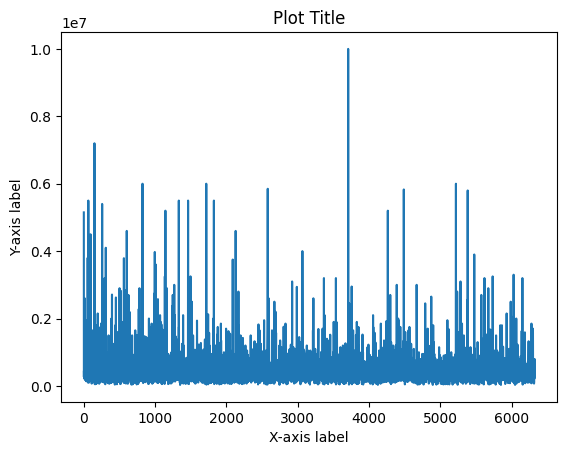

In [548]:
import matplotlib.pyplot as plt

car_train['Price'].plot()
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot Title')
plt.show()

In [559]:
car_test.head(10)

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,26,2014.0,84000.0,1,1,2,20.14,1498.0,88.50,5.0,300000.0
1,22,2018.0,18000.0,1,1,0,19.60,1461.0,108.45,5.0,1050000.0
2,18,2017.0,37000.0,1,0,0,26.80,1248.0,74.00,5.0,625000.0
3,25,2014.0,120000.0,1,1,0,12.99,2494.0,100.60,7.0,750000.0
4,18,2016.0,45000.0,3,1,0,21.40,1197.0,83.10,5.0,575000.0
5,7,2013.0,70000.0,1,1,0,20.00,1399.0,68.10,5.0,229999.0
6,18,2014.0,40000.0,3,1,2,20.92,998.0,67.10,5.0,254999.0
7,9,2014.0,60000.0,1,1,0,22.32,1582.0,126.32,5.0,730000.0
8,18,2010.0,35000.0,3,1,0,18.90,998.0,67.10,5.0,200000.0
9,18,2014.0,145500.0,1,1,0,23.40,1248.0,74.00,5.0,450000.0


In [523]:
print(car_train.info(),"\n",car_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           6320 non-null   object 
 1   Model             6320 non-null   float64
 2   Odometer reading  6320 non-null   float64
 3   fuel              6320 non-null   object 
 4   transmission      6320 non-null   object 
 5   owner             6320 non-null   object 
 6   mileage           6320 non-null   float64
 7   engine            6320 non-null   float64
 8   max_power         6320 non-null   float64
 9   seats             6320 non-null   float64
 10  Price             6320 non-null   float64
dtypes: float64(7), object(4)
memory usage: 543.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1581

In [524]:
print(car_train[car_train.duplicated()])

      Company   Model  Odometer reading    fuel transmission  owner  mileage  \
175     Lexus  2019.0           20000.0  Petrol    Automatic  First    22.37   
178       BMW  2019.0            8500.0  Diesel    Automatic  First    16.78   
186     Lexus  2019.0           20000.0  Petrol    Automatic  First    22.37   
204     Volvo  2018.0            2000.0  Diesel    Automatic  First    16.80   
238     Skoda  2016.0           11000.0  Petrol    Automatic  First    14.30   
...       ...     ...               ...     ...          ...    ...      ...   
6288   Maruti  2018.0           38817.0  Diesel       Manual  First    27.39   
6292  Hyundai  2016.0           40000.0  Diesel       Manual  First    24.80   
6297   Maruti  2016.0           23700.0  Petrol       Manual  First    20.40   
6304  Hyundai  2017.0           56290.0  Diesel       Manual  First    24.00   
6308    Honda  2016.0           56494.0  Petrol       Manual  First    18.20   

      engine  max_power  seats      Pri

In [525]:
print(car_test[car_test.duplicated()])

      Company   Model  Odometer reading    fuel transmission   owner  mileage  \
136     Volvo  2018.0            2000.0  Diesel    Automatic   First    16.80   
166      Tata  2015.0          110000.0  Diesel       Manual   First    14.10   
189    Jaguar  2017.0           45000.0  Diesel    Automatic   First    19.33   
190     Honda  2019.0            7032.0  Petrol    Automatic   First    19.00   
205       BMW  2019.0            8500.0  Diesel    Automatic   First    16.78   
...       ...     ...               ...     ...          ...     ...      ...   
1555  Hyundai  2015.0          108000.0  Diesel       Manual   First    21.19   
1556      BMW  2019.0            7500.0  Diesel    Automatic   First    16.78   
1558   Toyota  2013.0           79328.0  Diesel       Manual  Second    12.99   
1564    Volvo  2019.0           20000.0  Diesel    Automatic   First    18.00   
1575   Toyota  2011.0           70000.0  Petrol       Manual   First    17.60   

      engine  max_power  se

In [526]:
car_train.drop_duplicates(inplace=True)
car_test.drop_duplicates(inplace=True)

In [527]:
print(car_train[car_train.isna().any(axis=1)].index)
car_train = car_train.dropna(how='any')

Int64Index([647], dtype='int64')


In [528]:
print(car_test[car_test.isna().any(axis=1)].index)
car_test = car_test.dropna(how='any')

Int64Index([249], dtype='int64')


In [529]:
print(car_train.skew())

Model               -0.960878
Odometer reading    12.811756
mileage             -0.177588
engine               1.227546
max_power            1.740480
seats                1.949173
Price                5.556421
dtype: float64


<ipython-input-529-58b564f014e3>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(car_train.skew())


In [530]:
print(car_test.skew())

Model              -0.856748
Odometer reading    9.005418
mileage            -0.115311
engine              1.205321
max_power           1.705218
seats               1.792995
Price               4.738726
dtype: float64


<ipython-input-530-a70a1c54e608>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(car_test.skew())


In [531]:
# feature scaling
target_avg = max(car_train['Price']) - min(car_train['Price'])
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
label_encoder = LabelEncoder()
for column in ["Company", "fuel", "transmission", "owner"]:
  car_train[column] = label_encoder.fit_transform(car_train[column])
scaler = MinMaxScaler()
car_train_norm = pd.DataFrame(scaler.fit_transform(car_train[car_train.columns[:-1]]), columns=car_train.columns[:-1])
car_train_norm

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats
0,0.566667,0.961538,0.008473,1.000000,0.0,0.000000,0.532619,0.625168,0.494989,0.250000
1,0.666667,0.730769,0.033891,0.000000,1.0,0.666667,0.774286,0.125503,0.069526,0.250000
2,0.900000,0.884615,0.029655,0.333333,1.0,0.000000,0.454524,0.262081,0.098611,0.250000
3,0.300000,0.846154,0.029655,0.333333,1.0,0.666667,0.615000,0.293289,0.180283,0.250000
4,0.666667,0.846154,0.034315,0.333333,1.0,0.666667,0.668810,0.209396,0.151688,0.250000
...,...,...,...,...,...,...,...,...,...,...
5454,0.633333,0.769231,0.025418,0.333333,1.0,0.666667,0.359524,0.521812,0.291939,0.416667
5455,0.366667,0.807692,0.014827,1.000000,1.0,0.000000,0.442857,0.192282,0.133524,0.250000
5456,0.666667,0.923077,0.014827,0.333333,1.0,0.000000,0.676190,0.209396,0.112255,0.250000
5457,0.833333,0.846154,0.018640,1.000000,1.0,0.000000,0.599286,0.058725,0.055828,0.250000


In [560]:
target_avg_test = max(car_test['Price']) - min(car_test['Price'])

In [561]:
print(target_avg, target_avg_test)

9970001.0 5965000.0


In [532]:
car_train_target = pd.DataFrame(car_train['Price']/target_avg)

In [533]:
import seaborn as sns

<Axes: >

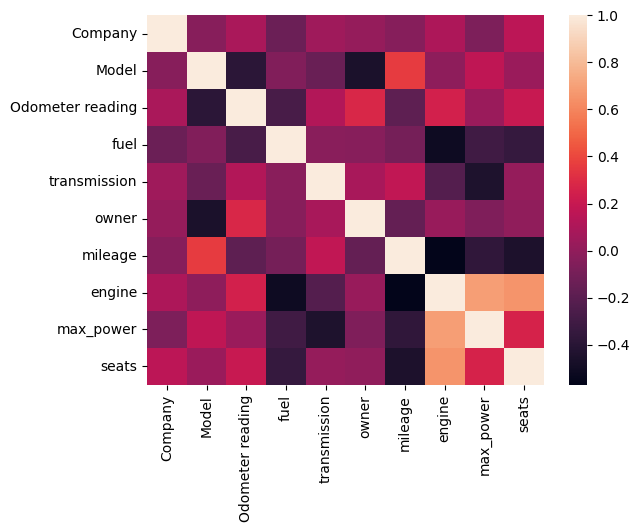

In [534]:
sns.heatmap(data = car_train_norm.corr())

In [535]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
label_encoder = LabelEncoder()
for column in ["Company", "fuel", "transmission", "owner"]:
  car_test[column] = label_encoder.fit_transform(car_test[column])
scaler = MinMaxScaler()
car_test_norm = pd.DataFrame(scaler.fit_transform(car_test[car_test.columns[:-1]]), columns=car_test.columns[:-1])
car_test_norm

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats
0,0.962963,0.727273,0.055370,0.333333,1.0,0.666667,0.661195,0.293289,0.220911,0.166667
1,0.814815,0.909091,0.011341,0.333333,1.0,0.000000,0.643467,0.280872,0.302075,0.166667
2,0.666667,0.863636,0.024016,0.333333,0.0,0.000000,0.879842,0.209396,0.161920,0.166667
3,0.925926,0.727273,0.079386,0.333333,1.0,0.000000,0.426461,0.627517,0.270138,0.500000
4,0.666667,0.818182,0.029353,1.000000,1.0,0.000000,0.702561,0.192282,0.198942,0.166667
...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.727273,0.152769,0.333333,0.0,0.000000,0.516415,0.451007,0.570098,0.166667
1455,0.259259,0.909091,0.021588,0.333333,1.0,0.000000,0.747538,0.293289,0.261961,0.166667
1456,0.333333,0.863636,0.035357,0.333333,1.0,0.000000,0.739987,0.259060,0.221847,0.166667
1457,0.666667,0.545455,0.079386,1.000000,1.0,1.000000,0.646750,0.057718,0.003255,0.666667


In [536]:
car_test_target = pd.DataFrame(car_test['Price']/target_avg)

In [537]:
print(car_train_norm.corr())

                   Company     Model  Odometer reading      fuel  \
Company           1.000000 -0.032806          0.089899 -0.135951   
Model            -0.032806  1.000000         -0.390624 -0.059339   
Odometer reading  0.089899 -0.390624          1.000000 -0.274442   
fuel             -0.135951 -0.059339         -0.274442  1.000000   
transmission      0.051428 -0.143906          0.118834 -0.027492   
owner             0.017794 -0.457894          0.276622 -0.031450   
mileage          -0.038966  0.358604         -0.188583 -0.100940   
engine            0.100342 -0.008503          0.245878 -0.513575   
max_power        -0.069990  0.170885          0.031537 -0.303616   
seats             0.158667  0.035445          0.200423 -0.345650   

                  transmission     owner   mileage    engine  max_power  \
Company               0.051428  0.017794 -0.038966  0.100342  -0.069990   
Model                -0.143906 -0.457894  0.358604 -0.008503   0.170885   
Odometer reading      0.11

In [538]:
print(car_train_norm.skew())
print(car_test_norm.skew())

Company             -0.224000
Model               -0.960878
Odometer reading    12.811756
fuel                 0.157575
transmission        -2.915050
owner                0.764142
mileage             -0.177588
engine               1.227546
max_power            1.740480
seats                1.949173
dtype: float64
Company            -0.321576
Model              -0.856748
Odometer reading    9.005418
fuel                0.328251
transmission       -2.815256
owner               0.802628
mileage            -0.115311
engine              1.205321
max_power           1.705218
seats               1.792995
dtype: float64


<Axes: >

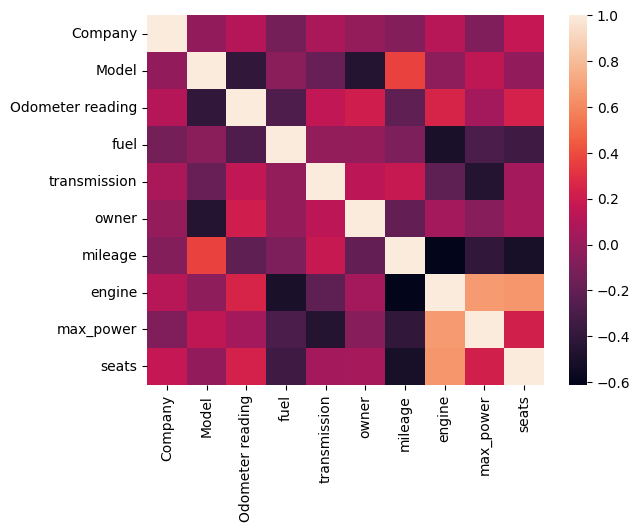

In [539]:
sns.heatmap(data = car_test_norm.corr())

In [540]:
car_train.cov()

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
Company,47.570538,-0.884150,3.546989e+04,-0.942245,0.100364,0.131525,-1.088539,3.400728e+02,-1.542724e+01,1.071864,-1.213024e+05
Model,-0.884150,15.269272,-8.731836e+04,-0.233004,-0.159109,-1.917492,5.675697,-1.632658e+01,2.134002e+01,0.135657,8.781236e+05
Odometer reading,35469.893373,-87318.361890,3.272466e+09,-15776.095107,1923.479934,16958.372168,-43695.301617,6.911596e+06,5.765481e+04,11229.735493,-4.821771e+09
fuel,-0.942245,-0.233004,-1.577610e+04,1.009768,-0.007817,-0.033868,-0.410837,-2.535920e+02,-9.750261e+00,-0.340199,-1.302945e+05
transmission,0.100364,-0.159109,1.923480e+03,-0.007817,0.080060,0.024205,0.198838,-3.151567e+01,-4.022490e+00,0.004659,-6.838594e+04
owner,0.131525,-1.917492,1.695837e+04,-0.033868,0.024205,1.148467,-0.707570,1.541463e+01,-2.234849e+00,-0.004896,-1.354721e+05
mileage,-1.088539,5.675697,-4.369530e+04,-0.410837,0.198838,-0.707570,16.405467,-1.135927e+03,-4.824792e+01,-1.777495,-2.269881e+05
engine,340.072827,-16.326580,6.911596e+06,-253.592031,-31.515671,15.414634,-1135.927321,2.414576e+05,1.083854e+04,314.286615,1.182426e+08
max_power,-15.427240,21.340016,5.765481e+04,-9.750261,-4.022490,-2.234849,-48.247917,1.083854e+04,1.021318e+03,8.144499,1.185119e+07
seats,1.071864,0.135657,1.122974e+04,-0.340199,0.004659,-0.004896,-1.777495,3.142866e+02,8.144499e+00,0.959335,8.327299e+04


In [541]:
data=car_test.cov()

In [562]:
class MLP:
  def __init__(self, layers, epochs, learning_rate):
    self.layers = layers
    self.epochs = epochs
    self.learningRate = learning_rate
    self.params = {}

    inputLayerDim = layers[0]
    hiddenLayer1Dim = layers[1]
    hiddenLayer2Dim = layers[2]
    hiddenLayer3Dim = layers[3]
    outputLayerDim = layers[4]



    self.params = {
        'W1':np.random.randn(hiddenLayer1Dim, inputLayerDim),
        'W2':np.random.randn(hiddenLayer2Dim, hiddenLayer1Dim),
        'W3':np.random.randn(hiddenLayer3Dim, hiddenLayer2Dim),
        'W4':np.random.randn(outputLayerDim, hiddenLayer3Dim),
    }

  def initialize_weights_xavier(self, input_units, output_units):
    variance = 2.0 / (input_units + output_units)
    stddev = np.sqrt(variance)
    return np.random.normal(loc=0, scale=stddev, size=(input_units, output_units))

  def ReLU(self, x, deriv = False):
    if deriv:
      return np.where(x<0, 0.1, 1)
    else:
      return np.maximum(x, 0.1*x)

  def forward(self, x_train):
    if(np.isnan(x_train).any()):
      print(f"forward pass: {x_train}")
    params = self.params
    params['A0'] = x_train
    params['Z1'] = np.dot(params['A0'], params['W1'].T)
    params['A1'] = self.ReLU(params['Z1'])
    params['Z2'] = np.dot(params['A1'], params['W2'].T)
    params['A2'] = self.ReLU(params['Z2'])
    params['Z3'] = np.dot(params['A2'], params['W3'].T)
    params['A3'] = self.ReLU(params['Z3'])
    params['Z4'] = np.dot(params['A3'], params['W4'].T)
    return params['Z4']

  def backProp(self, y_train, output):
    params = self.params
    change_w = {}

    error = 2*(output-y_train)/output.shape[0]
    change_w['W4'] = np.outer(error, params['A3'])

    error = np.dot(params['W4'].T, error)*self.ReLU(params['Z3'], deriv=True)
    change_w['W3'] = np.outer(error, params['A2'])

    error = np.dot(params['W3'].T, error)*self.ReLU(params['Z2'], deriv=True)
    change_w['W2'] = np.outer(error, params['A1'])

    error = np.dot(params['W2'].T, error)*self.ReLU(params['Z1'], deriv=True)
    change_w['W1'] = np.outer(error, params['A0'])

    return change_w

  def update_weights(self, change_w):
    for keys, values in change_w.items():
      self.params[keys] -= self.learningRate*values

  def loss(self, y_train, output):
    return (y_train-output)**2

  def accuracy(self, train_x, train_y, test_x, test_y):
    predictions_tn = []
    predictions_tt = []
    ttx = np.asfarray(test_x)
    tty = np.asfarray(test_y)
    tnx = np.asfarray(train_x)
    tny = np.asfarray(train_y)
    for x, y in zip(ttx, tty):
      inputs = np.asfarray(x)
      targets = np.asfarray(y)
      output = self.forward(inputs)
      #print(output, targets)
      predictions_tt.append(abs(output-targets) <= 0.011)

    for x, y in zip(tnx, tny):
      inputs = np.asfarray(x)
      targets = np.asfarray(y)
      output = self.forward(inputs)
      #print(output, targets)
      predictions_tn.append(abs(output-targets) <= 0.02)


    return np.mean(predictions_tn), np.mean(predictions_tt)

  def train(self, train_x, train_y, test_x, test_y):
    start_time = time.time()
    tx = np.asfarray(train_x)
    ty = np.asfarray(train_y)

    for i in range(self.epochs):
      for x, y in zip(tx, ty):
        inputs = np.asfarray(x)
        targets = np.asfarray(y)
        output = self.forward(inputs)
        change_w = self.backProp(targets, output)
        self.update_weights(change_w)

      accuracy = self.accuracy(train_x, train_y, test_x, test_y)
      print(f"Epoch: {i+1}, Time: {time.time()- start_time}, Train Accuracy: {accuracy[0]*100}, Test Accuracy: {accuracy[1]*100}")

In [575]:
np.random.seed(42)
mlp = MLP([10, 8, 8, 8, 1], epochs = 100, learning_rate = 0.01)
mlp.train(car_train_norm, car_train_target, car_test_norm, car_test_target)

Epoch: 1, Time: 0.6180808544158936, Train Accuracy: 48.360505587103866, Test Accuracy: 22.001370801919123
Epoch: 2, Time: 1.1562433242797852, Train Accuracy: 52.48213958600476, Test Accuracy: 24.742974640164498
Epoch: 3, Time: 1.731112003326416, Train Accuracy: 54.82689137204616, Test Accuracy: 24.400274160383827
Epoch: 4, Time: 2.2776341438293457, Train Accuracy: 56.805275691518595, Test Accuracy: 23.989033584647018
Epoch: 5, Time: 2.8466365337371826, Train Accuracy: 58.38065579776516, Test Accuracy: 23.440712816997944
Epoch: 6, Time: 3.3955001831054688, Train Accuracy: 59.40648470415827, Test Accuracy: 23.235092529129542
Epoch: 7, Time: 4.681535720825195, Train Accuracy: 60.3590401172376, Test Accuracy: 24.126113776559286
Epoch: 8, Time: 6.071940898895264, Train Accuracy: 60.87195457043415, Test Accuracy: 24.19465387251542
Epoch: 9, Time: 7.429933547973633, Train Accuracy: 61.97105697014105, Test Accuracy: 24.19465387251542
Epoch: 10, Time: 9.105868339538574, Train Accuracy: 62.99688

In [555]:
print(max(car_train['Price']))

10000000.0


In [556]:
min(car_train['Price'])

29999.0

# Report
## Train Tolerance <= 0.02
* Layers[10, 8, 4, 1] = [Epoch: 100, Time: 59.71622896194458, Train Accuracy: 75.14196739329547, Test Accuracy: 60.178204249485944]
* Layers[10, 16, 4, 1] = [Epoch: 100, Time: 72.73399090766907, Train Accuracy: 79.33687488551017, Test Accuracy: 51.199451679232354]
* Layers[10, 16, 8, 4, 1] = [Epoch: 100, Time: 71.96950101852417, Train Accuracy: 79.33687488551017, Test Accuracy: 51.199451679232354]
* Layers[10, 32, 16, 4, 1] = [Epoch: 15, Time: 11.228869438171387, Train Accuracy: 0.0, Test Accuracy: 0.0]
* Layers[10, 16, 4, 2, 1] = [Epoch: 100, Time: 72.23611855506897, Train Accuracy: 74.70232643341271, Test Accuracy: 45.716244002741604]
* Layers[10, 8, 4, 2, 1] = [Epoch: 100, Time: 64.68675875663757, Train Accuracy: 70.2326433412713, Test Accuracy: 41.19259766963674]
* Layers[10, 8, 4, 4, 1] = [Epoch: 100, Time: 63.42126274108887, Train Accuracy: 72.70562374061184, Test Accuracy: 36.66895133653187]
* Layers[10, 16, 8, 8, 1] = [Epoch: 100, Time: 73.76713037490845, Train Accuracy: 79.86810771203517, Test Accuracy: 45.3050034270048]
* Layers[10, 16, 16, 4, 1] = [Epoch: 100, Time: 74.0439715385437, Train Accuracy: 79.53837699212309, Test Accuracy: 51.130911583276216]
* Layers[10, 16, 16, 8, 1] = [Epoch: 24, Time: 22.547998666763306, Train Accuracy: 0.0, Test Accuracy: 0.0]
* Layers[10, 8, 16, 4, 1] = [Epoch: 100, Time: 82.5772774219513, Train Accuracy: 78.32936435244551, Test Accuracy: 57.710760795065106]
* Layers[10, 8, 8, 8, 1] = [Epoch: 100, Time: 80.23075890541077, Train Accuracy: 77.13867008609635, Test Accuracy: 42.76901987662783]
